In [2]:
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt

In [56]:
df_total=pd.read_csv('Order sales data_01.csv',encoding='cp1252')
df_cancel=pd.read_csv('Order sales data_02.csv',encoding='cp1252')

In [65]:
df_total.shape

(8399, 21)

In [81]:
ar=(df_total['Order ID'].unique())
len(ar)

5496

In [85]:
(df_total['Order ID'].duplicated())

0       False
1       False
2       False
3        True
4        True
5        True
6       False
7        True
8       False
9       False
10      False
11      False
12       True
13      False
14       True
15      False
16      False
17      False
18      False
19       True
20       True
21      False
22       True
23      False
24      False
25      False
26      False
27      False
28       True
29      False
        ...  
8369     True
8370    False
8371    False
8372     True
8373    False
8374     True
8375    False
8376    False
8377     True
8378    False
8379     True
8380    False
8381    False
8382     True
8383     True
8384    False
8385    False
8386     True
8387    False
8388    False
8389    False
8390    False
8391    False
8392    False
8393     True
8394    False
8395     True
8396     True
8397    False
8398     True
Name: Order ID, Length: 8399, dtype: bool

In [64]:
df_cancel.shape

(572, 2)

In [86]:
df = pd.merge(df_total, df_cancel, on=['Order ID'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)

In [87]:
df.shape

(7527, 22)

In [88]:
df.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Status
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.250,38.94,...,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,NaN
1,2,6,2012-02-20,Not Specified,2,6.9300,0.01,Regular Air,-4.640,2.08,...,Alberta,West,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Kleencut® Forged Office Shears by Acme United ...,Small Pack,0.55,2012-02-21,NaN
2,3,32,2011-07-15,High,26,2808.0800,0.07,Regular Air,1054.820,107.53,...,Alberta,West,Corporate,Furniture,Office Furnishings,Tenex Contemporary Contur Chairmats for Low an...,Medium Box,0.65,2011-07-17,NaN
3,4,32,2011-07-15,High,24,1761.4000,0.09,Delivery Truck,-1748.560,70.89,...,Alberta,West,Corporate,Furniture,Tables,KI Conference Tables,Jumbo Box,0.72,2011-07-16,NaN
4,5,32,2011-07-15,High,23,160.2335,0.04,Regular Air,-85.129,7.99,...,Alberta,West,Corporate,Technology,Telephones and Communication,Bell Sonecor JB700 Caller ID,Medium Box,0.60,2011-07-17,NaN


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7527 entries, 0 to 7526
Data columns (total 22 columns):
Row ID                  7527 non-null int64
Order ID                7527 non-null int64
Order Date              7527 non-null object
Order Priority          7527 non-null object
Order Quantity          7527 non-null int64
Sales                   7527 non-null float64
Discount                7527 non-null float64
Ship Mode               7527 non-null object
Profit                  7527 non-null float64
Unit Price              7527 non-null float64
Shipping Cost           7527 non-null float64
Customer Name           7527 non-null object
Province                7527 non-null object
Region                  7527 non-null object
Customer Segment        7527 non-null object
Product Category        7527 non-null object
Product Sub-Category    7527 non-null object
Product Name            7527 non-null object
Product Container       7527 non-null object
Product Base Margin     7473 non-nul

# Question 1

In [90]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7527 entries, 0 to 7526
Data columns (total 22 columns):
Row ID                  7527 non-null int64
Order ID                7527 non-null int64
Order Date              7527 non-null datetime64[ns]
Order Priority          7527 non-null object
Order Quantity          7527 non-null int64
Sales                   7527 non-null float64
Discount                7527 non-null float64
Ship Mode               7527 non-null object
Profit                  7527 non-null float64
Unit Price              7527 non-null float64
Shipping Cost           7527 non-null float64
Customer Name           7527 non-null object
Province                7527 non-null object
Region                  7527 non-null object
Customer Segment        7527 non-null object
Product Category        7527 non-null object
Product Sub-Category    7527 non-null object
Product Name            7527 non-null object
Product Container       7527 non-null object
Product Base Margin     7473

In [92]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin', 'Ship Date',
       'Status'],
      dtype='object')

In [93]:
import datetime as dt

In [94]:
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

In [95]:
df1= df[['Year','Month','Sales']]

In [96]:
df2=df1.groupby(['Year','Month']).sum()

In [97]:
df2

Sales
Year Month             
2009 1      397653.9825
     2      323086.9410
     3      373041.8040
     4      372828.2120
     5      210456.2585
     6      204974.6540
     7      330012.5905
     8      299164.2335
     9      300557.1835
     10     350436.0465
     11     176053.7855
     12     371211.5845
2010 1      315546.0705
     2      197515.8180
     3      190652.2705
     4      221820.8715
     5      253206.1270
     6      287537.5305
     7      198646.6445
     8      185643.2270
     9      330360.1035
     10     345740.0005
     11     262565.8775
     12     332238.5735
2011 1      236656.7930
     2      278837.7475
     3      277118.6815
     4      262872.0420
     5      254013.0020
     6      165600.0975
     7      280532.0065
     8      242715.8585
     9      225311.5420
     10     279360.6250
     11     340903.2255
     12     310331.8000
2012 1      289921.0690
     2      245948.0570
     3      318620.2495
     4      241611.0255
     5      371608.5700
     6      262962.5005
     7      213373.5755
     8      253547.2340
     9      277702.8235
     10     289152.8235
     11     219787.0410
     12     291308.3160

In [98]:
df2.max()

Sales    397653.9825
dtype: float64

In [99]:
df2.idxmax()

Sales    (2009, 1)
dtype: object

In [100]:
df3=df1.groupby('Month').sum()
df3

,Year,Sales
Month,,
1,1270567,1.239778e+06
2,1162062,1.045389e+06
3,1280703,1.159433e+06
4,1212352,1.099132e+06
5,1411444,1.089284e+06
6,1156014,9.210748e+05
7,1268593,1.022565e+06
8,1280649,9.810706e+05
9,1332961,1.133932e+06


In [101]:
df3.max()

Year     1411444.000
Sales    1305090.274
dtype: float64

In [102]:
df3.idxmax()

Year      5
Sales    12
dtype: int64

In [49]:
# Sales are higher in December

# Question 2

In [103]:
df['Ship Mode'].describe()

count            7527
unique              3
top       Regular Air
freq             5637
Name: Ship Mode, dtype: object

In [104]:
df['Discount'].corr(df['Sales'])

-0.01919034307134497

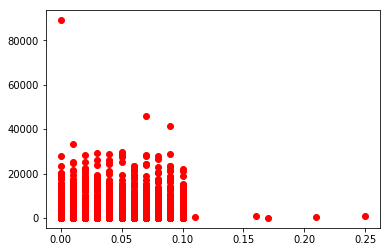

In [105]:
plt.plot(df['Discount'], df['Sales'], 'ro')
plt.show()

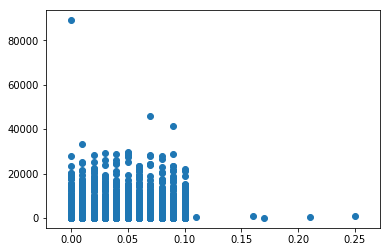

In [106]:
x=df['Discount']
y=df['Sales']
plt.scatter(x, y)
plt.show()

In [48]:
# Sales are higher when the discounts are less

# Question 3

In [107]:
df4=df[['Product Name','Order Quantity']]
df4.head()

,Product Name,Order Quantity
0,"Eldon Base for stackable storage shelf, platinum",6
1,Kleencut® Forged Office Shears by Acme United ...,2
2,Tenex Contemporary Contur Chairmats for Low an...,26
3,KI Conference Tables,24
4,Bell Sonecor JB700 Caller ID,23


In [108]:
df5=df4.groupby(['Product Name']).sum()
df5

,Order Quantity
Product Name,
"""While you Were Out"" Message Book, One Form per Page",111
#10 Self-Seal White Envelopes,148
"#10 White Business Envelopes,4 1/8 x 9 1/2",367
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",421
"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",92
"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",169
#6 3/4 Gummed Flap White Envelopes,191
*Staples* Highlighting Markers,183
*Staples* Letter Opener,110


In [109]:
df5.idxmax()

Order Quantity    Global High-Back Leather Tilter, Burgundy
dtype: object

In [50]:
# Most popular product is  Global High-Back Leather Tilter, Burgundy

# Question 4